# Covid-19 Data Visualization


### Installing Required Packages

In [1]:
# install.packages("ggplot2")
# install.packages("RColorBrewer")
# install.packages("dplyr")
# install.packages("ggmap")
# install.packages("dichromat")
# install.packages("maps")
# install.packages("mapproj")

options(warn = - 1)  # Disable warning messages globally              

### Libraries

In [3]:
library(ggplot2)
library(RColorBrewer)
library(dplyr)
library(ggmap)
library(dichromat)

### Reading Datasets

In [4]:
covid <- read.csv("../datasets/11-06-2020.csv", as.is=TRUE, header=TRUE)
who <- read.csv("../datasets/WHO-COVID-19-global-data.csv", as.is=TRUE, header=TRUE)
age <- read.csv("../datasets/Provisional_COVID-19_Death_Counts_by_Sex__Age__and_State.csv", as.is=TRUE, header=TRUE)
world <- map_data("world")
us <- map_data("state")

### Color palettes

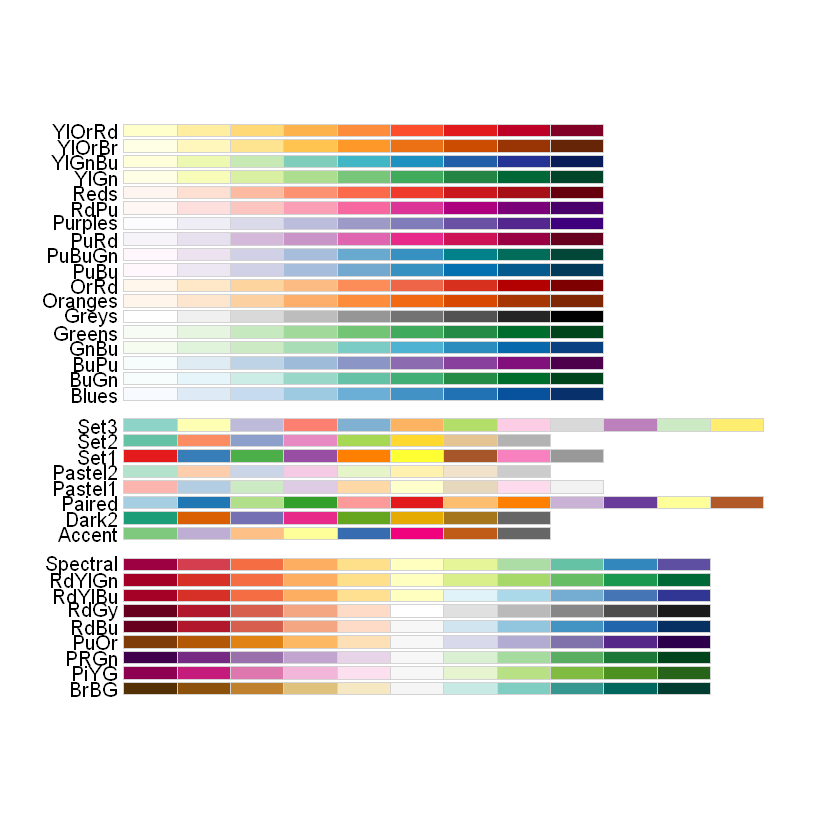

In [5]:
# Check Color palettes
display.brewer.all()
#p <- colorRampPalette(dichromat(brewer.pal(8,'Blues'), type = c("deutan", "protan", "tritan")))(100)
#p

### Data Carpentry

In [6]:
colnames(who)[colnames(who) == "ï..Date_reported"] <- "Date_reported"

who$Country[who$Country=='Antigua and Barbuda']                              = "Antigua"
who$Country[who$Country=='Bolivia (Plurinational State of)']                 = "Bolivia"
who$Country[who$Country=='Bonaire, Sint Eustatius and Saba']                 = "Bonaire"
who$Country[who$Country=='Brunei Darussalam']                                = "Brunei"
who$Country[who$Country=='Cabo Verde']                                       = "Cape Verde"
who$Country[who$Country=='Congo']                                            = "Republic of Congo"
who$Country[who$Country=='Côte d’Ivoire']                                    = "Ivory Coast"
who$Country[who$Country=='Curaçao']                                          = "Curacao"
who$Country[who$Country=='Czechia']                                          = "Czech Republic"
who$Country[who$Country=="Democratic People's Republic of Korea"]            = "North Korea"
who$Country[who$Country=='Falkland Islands (Malvinas)']                      = "Falkland Islands"
who$Country[who$Country=='Holy See']                                         = "Vatican"
who$Country[who$Country=='Iran (Islamic Republic of)']                       = "Iran"
who$Country[who$Country=='Kosovo[1]']                                        = "Kosovo"
who$Country[who$Country=="Lao People's Democratic Republic"]                 = "Laos"
who$Country[who$Country=='Micronesia (Federated States of)']                 = "Micronesia"
who$Country[who$Country=='North Macedonia']                                  = "Macedonia"
who$Country[who$Country=='Northern Mariana Islands (Commonwealth of the)']   = "Northern Mariana Islands"
who$Country[who$Country=='Republic of Korea']                                = "South Korea"
who$Country[who$Country=='Republic of Moldova']                              = "Moldova"
who$Country[who$Country=='Réunion']                                          = "Reunion"
who$Country[who$Country=='Russian Federation']                               = "Russia"
who$Country[who$Country=='Saint Barthélemy']                                 = "Saint Barthelemy"
who$Country[who$Country=='Saint Kitts and Nevis']                            = "Saint Kitts"
who$Country[who$Country=='Saint Vincent and the Grenadines']                 = "Saint Vincent"
who$Country[who$Country=='Syrian Arab Republic']                             = "Syria"
who$Country[who$Country=='The United Kingdom']                               = "UK"
who$Country[who$Country=='Trinidad and Tobago']                              = "Tobago"
who$Country[who$Country=='United Republic of Tanzania']                      = "Tanzania"
who$Country[who$Country=='United States of America']                         = "USA"
who$Country[who$Country=='United States Virgin Islands']                     = "Virgin Islands"
who$Country[who$Country=='Venezuela (Bolivarian Republic of)']               = "Venezuela"
who$Country[who$Country=='Viet Nam']                                         = "Vietnam"

whoMonth <- who %>% filter(   Date_reported == '2020-01-29' | 
                              Date_reported == '2020-02-29' |
                              Date_reported == '2020-03-29' |
                              Date_reported == '2020-04-29' |
                              Date_reported == '2020-05-29' |
                              Date_reported == '2020-06-29' |
                              Date_reported == '2020-07-29' |
                              Date_reported == '2020-08-29' |
                              Date_reported == '2020-09-29' |
                              Date_reported == '2020-10-29' |
                              Date_reported == '2020-11-05')

who$Country[who$Country=='Viet Nam'] = "Vietnam"


In [7]:
covMap <- covid %>%
            group_by(Country_Region) %>% 
            summarise(Confirmed = sum(Confirmed),Deaths = sum(Deaths), Recovered = sum(Recovered), Active= sum(Active))

# Naming fix for map (Found wrong ones with python that why is hardcoded)
covMap$Country_Region[covMap$Country_Region == "Antigua and Barbuda"] = "Antigua"
covMap$Country_Region[covMap$Country_Region == "Burma"] = "Myanmar" 
covMap$Country_Region[covMap$Country_Region == "Cabo Verde"] ="Cape Verde"
covMap$Country_Region[covMap$Country_Region == "Congo (Brazzaville)"]="Republic of Congo"
covMap$Country_Region[covMap$Country_Region == "Congo (Kinshasa)"]="Democratic Republic of the Congo"
covMap$Country_Region[covMap$Country_Region == "Cote d'Ivoire"] = "Ivory Coast"
covMap$Country_Region[covMap$Country_Region == "Czechia"]="Czech Republic"
covMap$Country_Region[covMap$Country_Region == "Holy See"]="Vatican"
covMap$Country_Region[covMap$Country_Region == "Korea, South"]="South Korea"
covMap$Country_Region[covMap$Country_Region == "North Macedonia"]="Macedonia"
covMap$Country_Region[covMap$Country_Region == "Saint Kitts and Nevis"]="Nevis"
covMap$Country_Region[covMap$Country_Region == "Saint Vincent and the Grenadines"]="Saint Vincent"
covMap$Country_Region[covMap$Country_Region == "Taiwan*"]="Taiwan"
covMap$Country_Region[covMap$Country_Region == "Trinidad and Tobago"]="Tobago"
covMap$Country_Region[covMap$Country_Region == "US"]="USA"
covMap$Country_Region[covMap$Country_Region == "United Kingdom"]="UK"
covMap$Country_Region[covMap$Country_Region == "West Bank and Gaza"]="Palestine"

covMap$Active[covMap$Country_Region == "Canada"]=36373 

covMap$DeathRate = (covMap$Deaths / covMap$Confirmed) * 100
covMap$RecoveredRate = (covMap$Recovered / covMap$Confirmed) * 100
covMap$ActiveRate = (covMap$Active / covMap$Confirmed) * 100

covMap$DeathRate[is.null(covMap$DeathRate)]=0


`summarise()` ungrouping output (override with `.groups` argument)


In [8]:
lowerAge <- age
lowerAge$State <- tolower(lowerAge$State)

states <- lowerAge %>% filter(State != "united states")

### Visualization

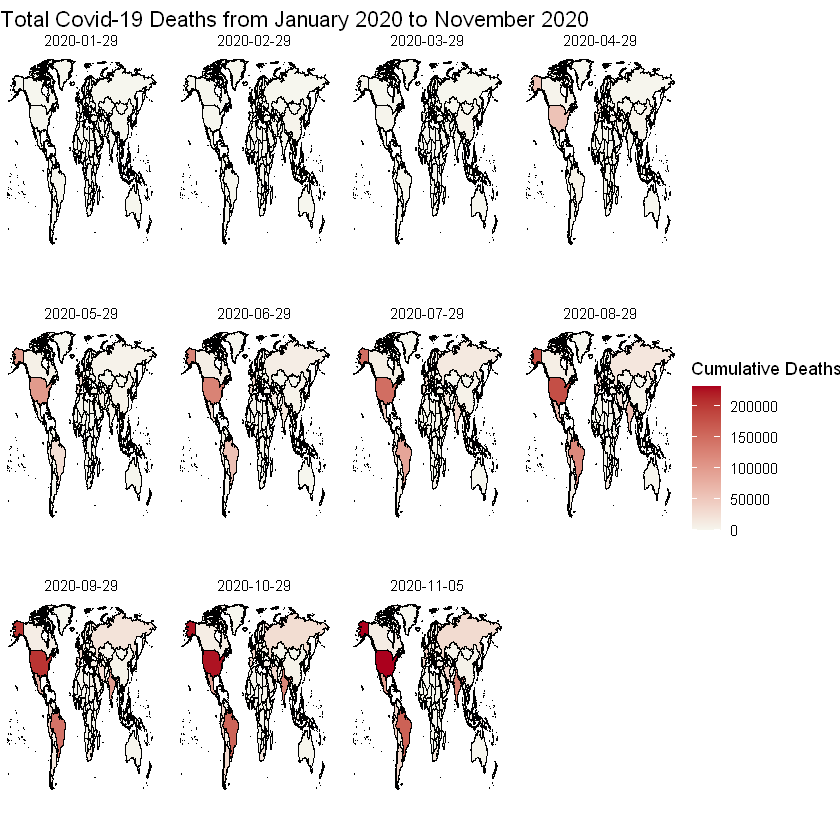

In [9]:
plot1 <- ggplot(data=whoMonth,aes(fill=Cumulative_deaths))+

    geom_map(map=world, aes(map_id=Country), color="black", size=0.1) +

    expand_limits(x = world$long, y = world$lat) +

    scale_fill_gradient(low="#F6F6EE",high="#AB001D", name="Cumulative Deaths") +

    facet_wrap(~Date_reported) +

    labs(title = "Total Covid-19 Deaths from January 2020 to November 2020")+

    theme_void()

plot1

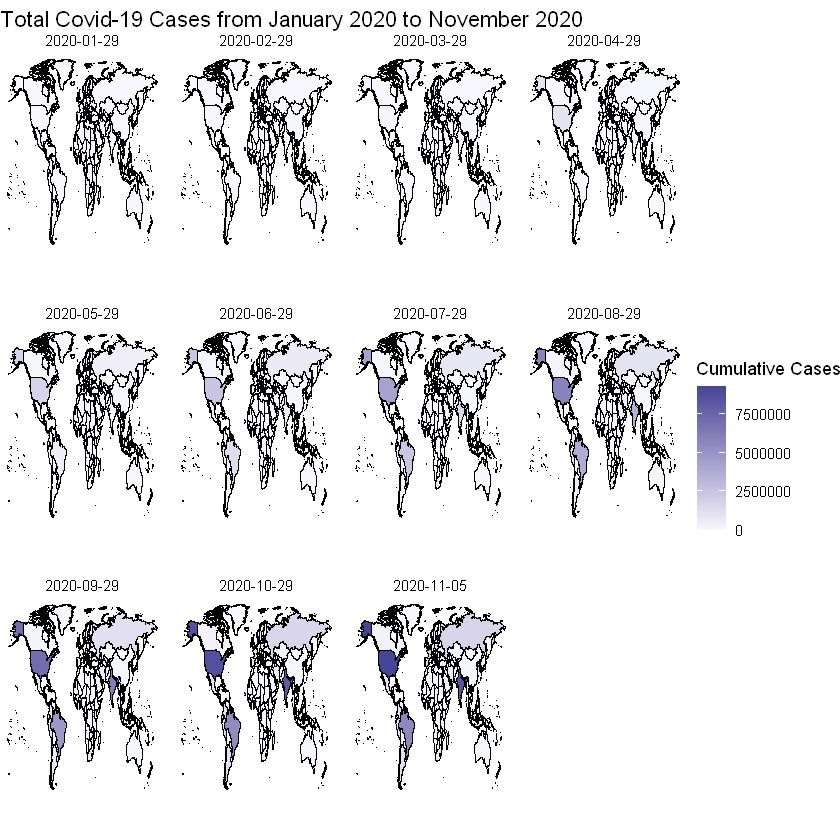

In [10]:
plot2 <- ggplot(data=whoMonth,aes(fill=Cumulative_cases))+

    geom_map(map=world, aes(map_id=Country), color="black", size=0.1) +

    expand_limits(x = world$long, y = world$lat) +

    scale_fill_gradient(low="#F7F7FD",high="#464696", name="Cumulative Cases") +

    facet_wrap(~Date_reported) +

    labs(title = "Total Covid-19 Cases from January 2020 to November 2020")+

    theme_void()

plot2

In [11]:
who %>% filter(Date_reported == "2020-11-08") %>%
     arrange(Cumulative_deaths) %>%
     tail(6)

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
230,2020-11-08,IT,Italy,EURO,39809,902490,425,41063
231,2020-11-08,GB,UK,EURO,24957,1171445,413,48888
232,2020-11-08,MX,Mexico,AMRO,5931,955128,551,94323
233,2020-11-08,IN,India,SEARO,45674,8507754,559,126121
234,2020-11-08,BR,Brazil,AMRO,0,5590025,0,161106
235,2020-11-08,US,USA,AMRO,0,9504758,0,233292


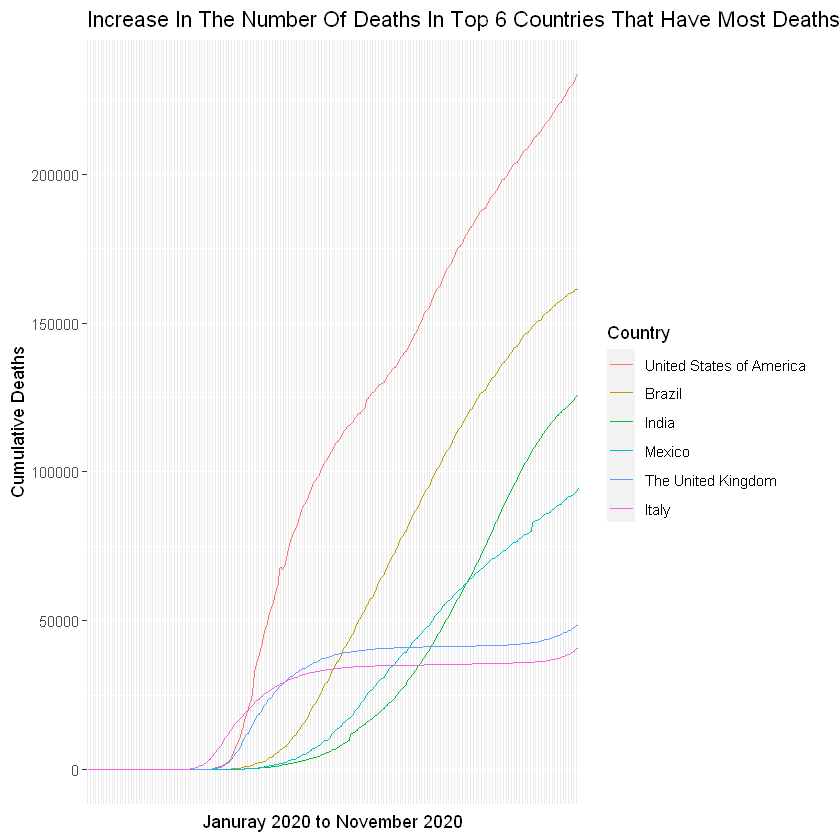

In [12]:
mostDeaths <- who %>% filter(Country == "Italy" |
                             Country == "UK" |
                             Country == "Mexico" |
                             Country == "India" |
                             Country == "Brazil" |
                             Country == "USA")

mostDeaths$Country[mostDeaths$Country=="UK"] = 'The United Kingdom'
mostDeaths$Country[mostDeaths$Country=="USA"] = 'United States of America'

mostDeaths$Country <- factor(mostDeaths$Country,
                         levels = c("United States of America", "Brazil", "India", "Mexico", "The United Kingdom", "Italy"))

plot3 <-ggplot(mostDeaths, aes(x=Date_reported, y=Cumulative_deaths, group=Country, color= Country)) +
        
    geom_line() +
        
    theme(axis.text.x=element_blank(), axis.ticks.x=element_blank()) + 
    
    labs(title = "Increase In The Number Of Deaths In Top 6 Countries That Have Most Deaths") +

    xlab("Januray 2020 to November 2020") +
      
    ylab("Cumulative Deaths")

plot3

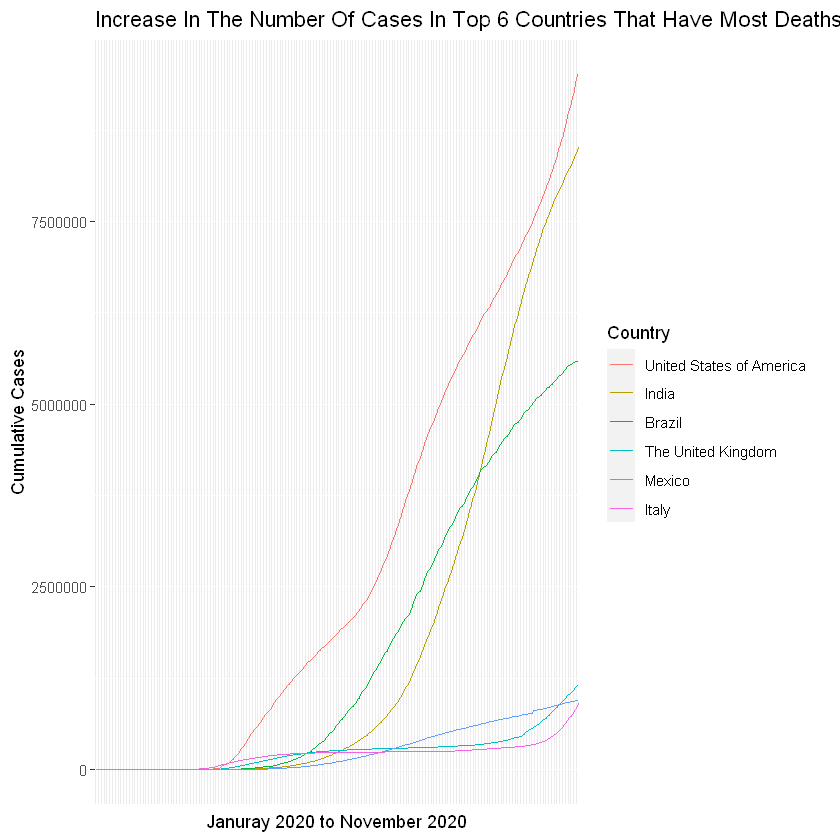

In [13]:
mostDeaths$Country <- factor(mostDeaths$Country,
                         levels = c("United States of America", "India", "Brazil", "The United Kingdom", "Mexico", "Italy"))

plot4 <- ggplot(mostDeaths, aes(x=Date_reported, y=Cumulative_cases, group=Country, color= Country)) +
        
    geom_line() +

    theme(axis.text.x=element_blank(), axis.ticks.x=element_blank()) + 
    
    labs(title = "Increase In The Number Of Cases In Top 6 Countries That Have Most Deaths") +

    xlab("Januray 2020 to November 2020") +
      
    ylab("Cumulative Cases")

plot4

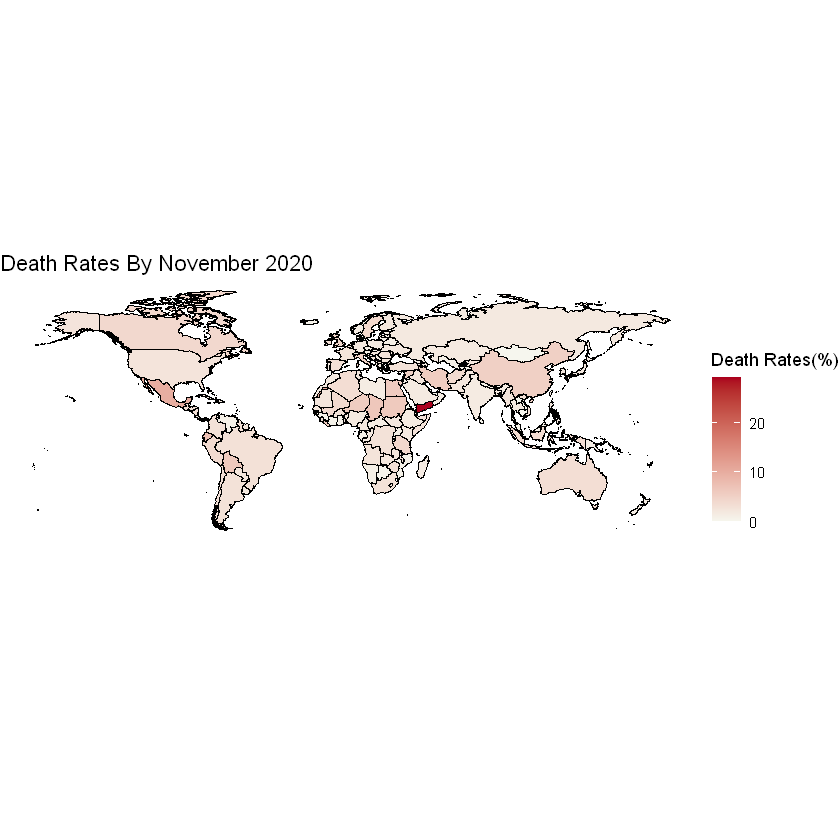

In [14]:
plot5 <- ggplot(data=covMap,aes(fill=DeathRate))+

    geom_map(map=world, aes(map_id=Country_Region), color="black", size=0.1) +

    expand_limits(x = world$long, y = world$lat) +

    scale_fill_gradient(low="#F6F6EE",high="#AB001D", name="Death Rates(%)") +

    coord_equal()+

    labs(title = "Death Rates By November 2020") +

    theme_void() 

plot5

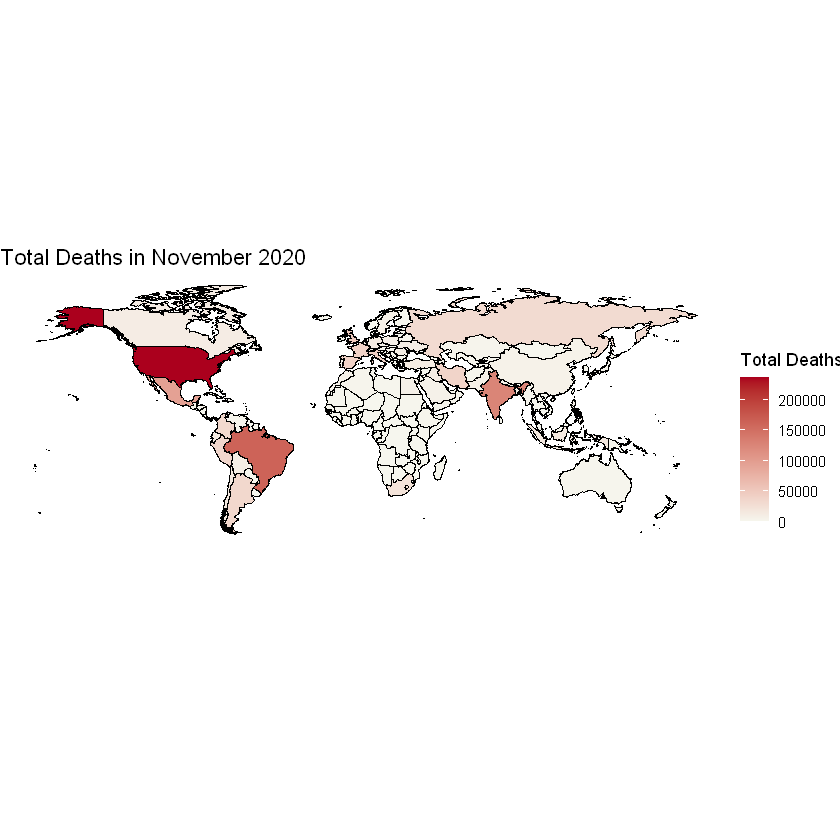

In [15]:
plot6 <- ggplot(data=covMap,aes(fill=Deaths))+

    geom_map(map=world, aes(map_id=Country_Region), color="black", size=0.1) +

    expand_limits(x = world$long, y = world$lat) +

    scale_fill_gradient(low="#F6F6EE",high="#AB001D", name="Total Deaths") +
    
    coord_equal()+

    labs(title = "Total Deaths in November 2020") +

    theme_void() 

plot6

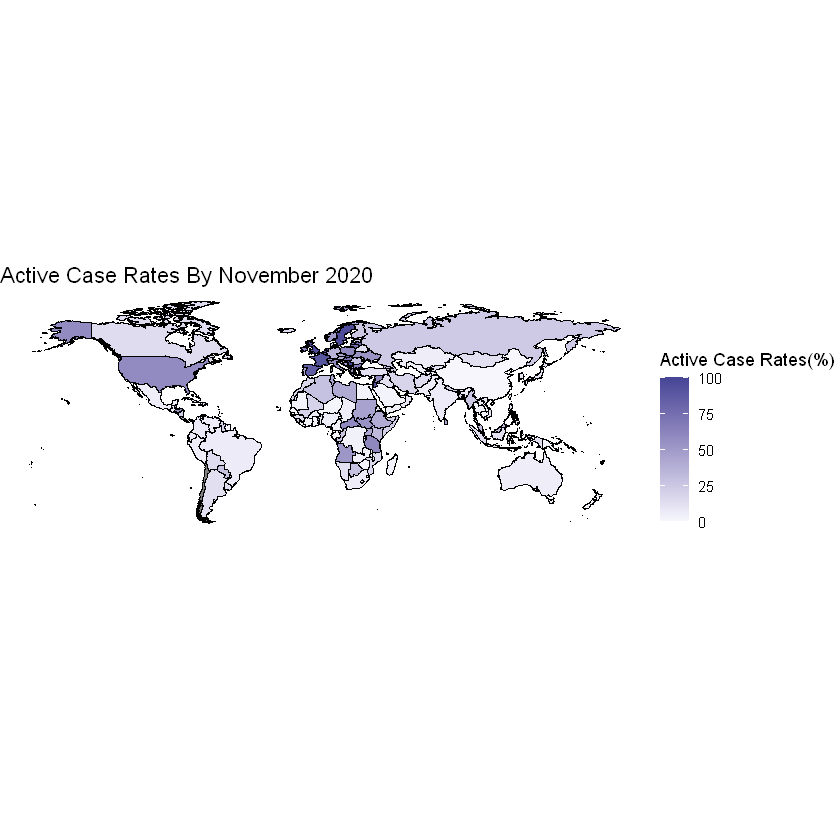

In [16]:
plot7 <- ggplot(data=covMap,aes(fill=ActiveRate))+

    geom_map(map=world, aes(map_id=Country_Region), color="black", size=0.1) +

    expand_limits(x = world$long, y = world$lat) +

    scale_fill_gradient(low="#F7F7FD",high="#464696", name="Active Case Rates(%)") +

    coord_equal() +

    labs(title = "Active Case Rates By November 2020") +

    theme_void() 

plot7

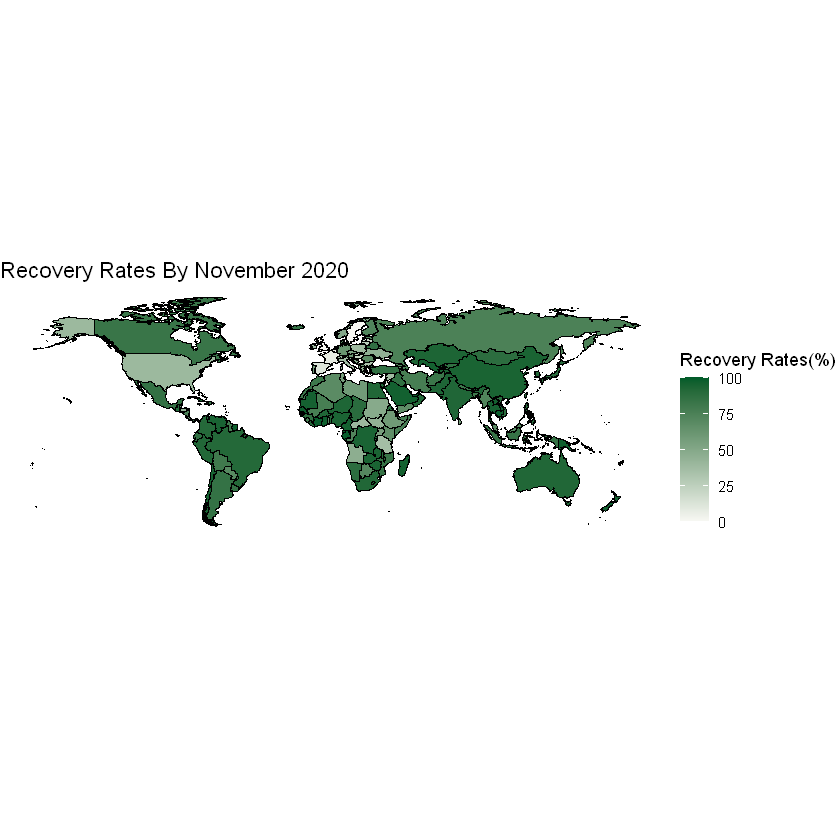

In [17]:
plot8 <- ggplot(data=covMap,aes(fill=RecoveredRate))+

    geom_map(map=world, aes(map_id=Country_Region), color="black", size=0.1) +

    expand_limits(x = world$long, y = world$lat) +

    scale_fill_gradient(low="#F8F8F3",high="#005B29" , name="Recovery Rates(%)") +

    coord_equal() +

    labs(title = "Recovery Rates By November 2020") +

    theme_void() 

plot8

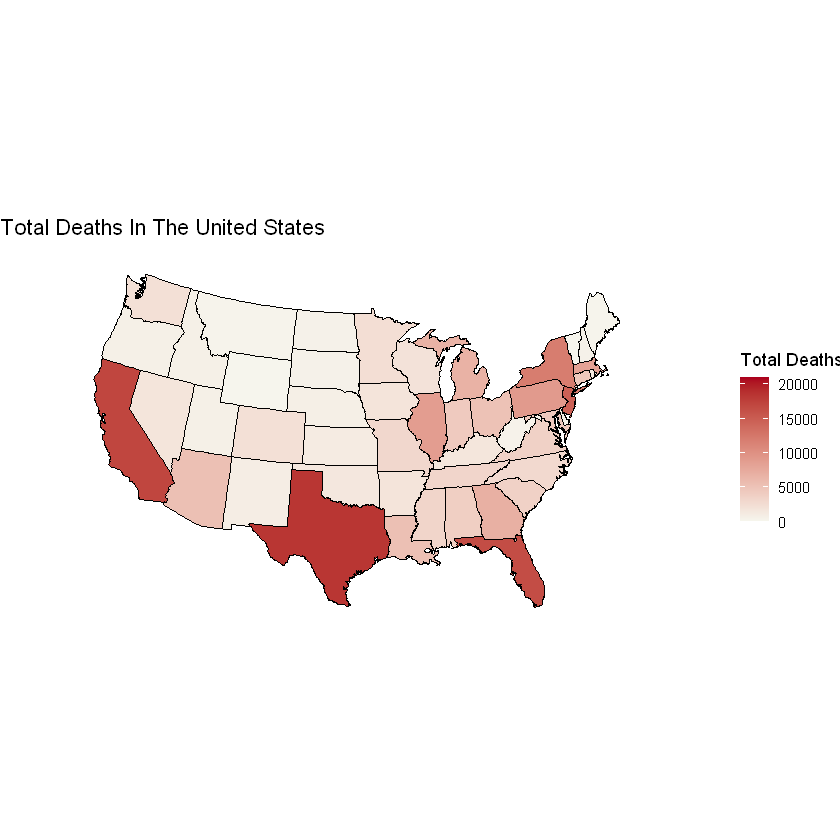

In [18]:
plot11 <- ggplot(data=states, aes(fill=COVID.19.Deaths)) + 

    geom_map(map=us, aes(map_id=State), color="black", size=0.1) +
    
    expand_limits(x = us$long, y = us$lat) + 

    scale_fill_gradient(low="#F6F6EE",high="#AB001D", name="Total Deaths") +

    labs(title = "Total Deaths In The United States") +

    coord_map("polyconic") +

    theme_void() 

plot11

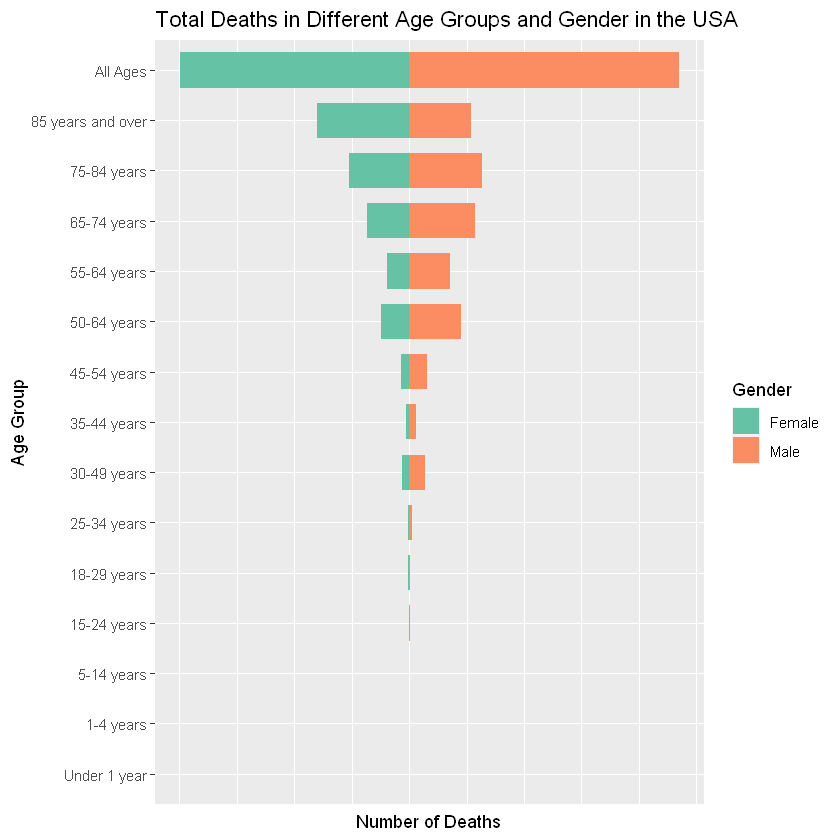

In [19]:
plot9 <- ggplot(age, aes(x= Age.group, y=COVID.19.Deaths, fill=Sex)) + 

    geom_bar(data = subset(age, State == "United States" & Sex == "Male"), stat = "identity",position = "stack", width=0.7) +

    geom_bar(data = subset(age, State == "United States" & Sex == "Female"), stat = "identity",position = "stack", width=0.7, aes(y=-COVID.19.Deaths)) +

    scale_x_discrete(limits = c( "Under 1 year",
                                "1-4 years",
                                "5-14 years	",
                                "15-24 years",
                                "18-29 years",
                                "25-34 years",
                                "30-49 years",
                                "35-44 years",
                                "45-54 years",
                                "50-64 years",
                                "55-64 years",
                                "65-74 years",
                                "75-84 years",
                                "85 years and over",
                                "All Ages")) +

    theme(axis.text.x=element_blank(), axis.ticks.x=element_blank()) + 

    guides(fill=guide_legend(title="Gender")) +

    coord_flip() +  

    xlab("Age Group") +
      
    ylab("Number of Deaths") +

    labs(title = "Total Deaths in Different Age Groups and Gender in the USA") +

    scale_fill_brewer(palette="Set2")

plot9

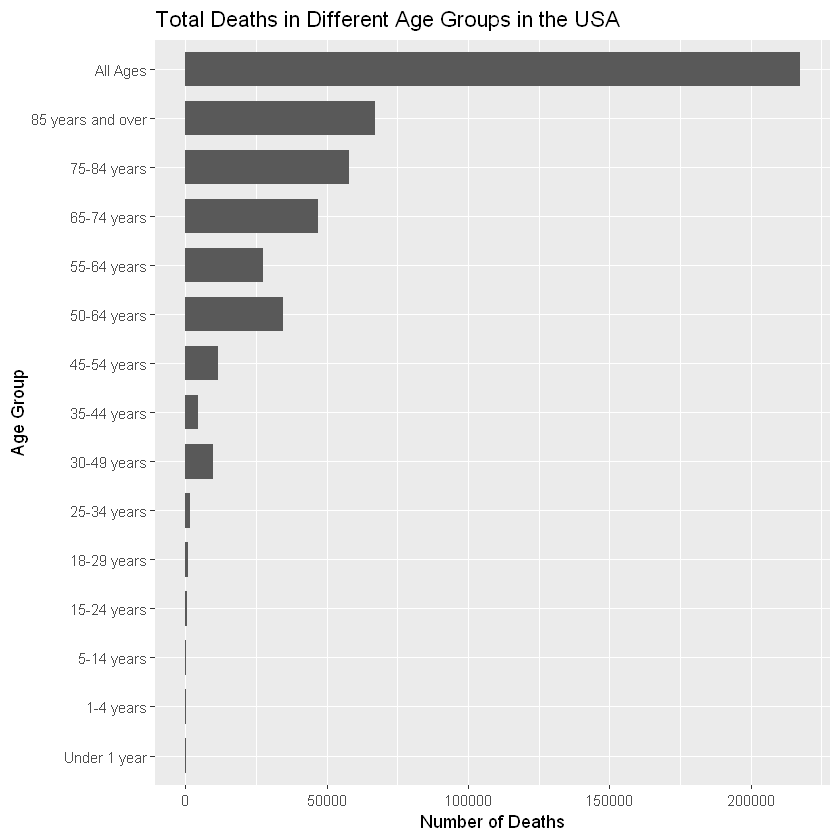

In [20]:
plot10 <- ggplot(age, aes(x= Age.group, y=COVID.19.Deaths)) + 

    geom_bar(data = subset(age, State == "United States" & Sex == "All Sexes"), stat = "identity",position = "stack", width=0.7) +

    scale_x_discrete(limits = c( "Under 1 year",
                                 "1-4 years",
                                 "5-14 years",
                                 "15-24 years",
                                 "18-29 years",
                                 "25-34 years",
                                 "30-49 years",
                                 "35-44 years",
                                 "45-54 years",
                                 "50-64 years",
                                 "55-64 years",
                                 "65-74 years",
                                 "75-84 years",
                                 "85 years and over",
                                 "All Ages")) +
    coord_flip() +  

    xlab("Age Group") +
      
    ylab("Number of Deaths") +

    labs(title = "Total Deaths in Different Age Groups in the USA") +

    scale_fill_brewer(palette="Set2")

plot10